# **MLP 활용(회귀) - 데이터 직군 연봉 예측**  
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「가설 수립 및 검증」
* 🥇Session 3 - 「MLP 활용 연봉 예측」

In [9]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Deep Learning/02 MLP")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Deep Learning/02 MLP'

## [STEP 01] 문제상황 및 데이터 살펴보기
---
> **시나리오** 💰

```
A사는 요즘 핫(hot)한 데이터 직군 채용에 힘쓰고 있다. 사업을 확장하면서 발생하는 데이터의 양이 증가했고, 이를 통해 인사이트와 핵심 이슈들을   
선별하는 작업들이 필수적이게 되었다. 이에 데이터 직군을 채용하려고 하는데 어느 정도의 연봉을 들여서 채용을 해야하는지 고민에 빠져 있다.  
지원자의 데이터를 통해 데이터 직군 연봉을 예측하는 모델을 만들고, 협상시 베이스 라인으로 활용하고자 한다.

```  

> **데이터 살펴보기**

* 데이터 직군 연봉 및 추가정보
* 데이터 명세 ⬇
* https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

|Column|Description|
|:---|:---|
|work_year| 급여를 지급한 해|
|experience_level|직무 경험수준 (EN : 주니어 / MI : 중급, SE : 시니어 레벨, 전문가 / EX : 임원급, 이사)|
|employment_type|고용 유형 (PT: 파트타임 / FT : 풀타임 / CT : 계약직 / FL : 프리랜서)|
|job_title|직무|
|salary|총 급여|
|salary_currency|통화 코드|
|salaryinusd|급여(USD)|
|employee_residence|근무 연도 중 거주 국가|
|remote_ratio|원격 근무 비율|
|company_location|회수 위치|
|company_size|당해 연도 평균 근무인원 (S : 50인 미만(소) / M : 50~250인(중) / L : 250인 이상(대))|




In [10]:
# pd.set option
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# Data read
df = pd.read_csv("../dataset/dataset_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## [STEP 02] 문제해결 프로세스 정의
---
> **문제정의**

```
▶ 데이터 직군 직원 채용 시 연봉 산정 어려움
```  

> **기대효과**

```
▶ 채용 시 연봉 산정 베이스 라인 활용으로 원활한 채용 진행
```

> **해결방안**

```
▶ 지원자의 정보를 통해 데이터 직군 연봉 추정(예측)
▶ Session 1 🥉
 - Data 전처리 및 EDA
▶ Session 2 🥈
 - 가설을 수립하고 데이터를 통해 검증
▶ Session 3 🥇
 - MLP 활용 연봉 에측 모델링 수행
```

> **성과측정**  

```
▶ 모델 활용 전/후 채용 프로세스 진행 속도 비교
```

> **현업적용**  

```
▶ 지원자 채용 시 모델 활용 협상 진행
```

> **주요 코드 미리 살펴보기**  

```
▶ Session 1 → df.isnull().sum(), value_counts(), .append()
▶ Session 2 → .reset_index(), .isin(), .astype()
▶ Session 3 → OneHotEncoder(), .unsqueeze(1), TensorDataset, DataLoader
```

### Session 1  
**┗ Data 전처리 및 EDA**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

In [11]:
# Data 형태 확인, 607 row, 12 col로 구성
print('df :', df.shape)

df : (607, 12)


In [12]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [14]:
# Null 값 확인
print(df.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [15]:
# Outlier 확인
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### · Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [16]:
# 필요 없는 변수 사전 제거
# 범용적으로 사용할 수 있는 salary_in_usd col만 사용
df = df.drop(['Unnamed: 0', 'salary_currency', 'salary'], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [17]:
# 숫자형, 범주형 변수 분할
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O':
    categorical_list.append(i)
  else:
    numerical_list.append(i)

print("categorical_list :", categorical_list)
print("numerical_list :", numerical_list)

categorical_list : ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
numerical_list : ['work_year', 'salary_in_usd', 'remote_ratio']


In [21]:
# 범주형 변수 유니크 값 출력
list_of_df = []

for var in categorical_list :
  loop_df = pd.DataFrame({'var':[var], 'n_cnt':[df[var].nunique()]})
  list_of_df.append(loop_df)

df_concat = pd.concat(list_of_df).reset_index(drop=True)
df_concat

,var,n_cnt
0,experience_level,4
1,employment_type,4
2,job_title,50
3,employee_residence,57
4,company_location,50
5,company_size,3


In [22]:
# job_title 살펴보기
df_job = pd.DataFrame(df['job_title'].value_counts())
df_job.head(10)

,job_title
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Big Data Engineer,8
Machine Learning Scientist,8
Principal Data Scientist,7


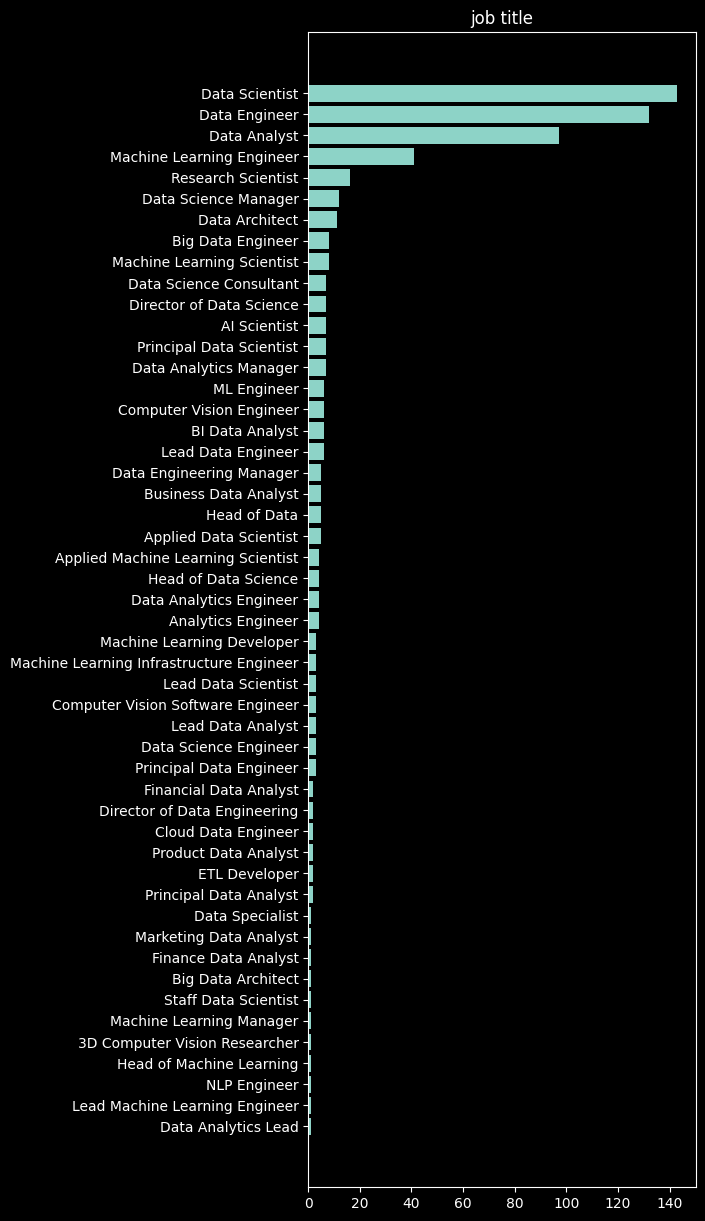

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

df_job = df_job.sort_values(by=['job_title'])

fig = plt.figure(figsize=(5,15));
plt.title('job title');
plt.barh(df_job.index, df_job['job_title']);
#plt.xticks(rotation=-90);

### Session 2  
**┗ 가설 수립 및 검증**  
---
* 문제해결 프로세스(Problem Solving Process)에서 가장 핵심적인 부분
* 가설은 문제해결을 위한 '핵심 아이디어'
* 현재 우리가 보유하고 있는 데이터로 문제를 해결할 수 있는지 사전 검증하는 작업

### · ① 연도가 증가할 수록 연봉이 상승할 것이다.
---

In [ ]:
# ▶ 데이터 확인
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [ ]:
# ▶ 연도 별 평균 연봉 계산
df_work_year = pd.DataFrame(df.groupby('work_year')['salary_in_usd'].mean()).reset_index()
df_work_year

,work_year,salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


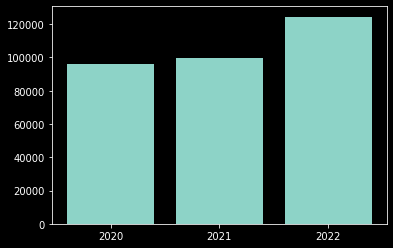

In [ ]:
# ▶ 연도 별 평균 연봉 시각화
plt.bar(df_work_year['work_year'].astype(str), df_work_year['salary_in_usd']);

In [ ]:
df['job_title'].head()

0                Data Scientist
1    Machine Learning Scientist
2             Big Data Engineer
3          Product Data Analyst
4     Machine Learning Engineer
Name: job_title, dtype: object

In [ ]:
# ▶ Top 3 직군별 연봉 비교 분석
top3 = ['Data Scientist', 'Data Engineer', 'Data Analyst']
df_top3 = pd.DataFrame(df[df['job_title'].isin(top3)].groupby(['work_year', 'job_title'])['salary_in_usd'].mean())
df_top3.reset_index(inplace=True)
df_top3

,work_year,job_title,salary_in_usd
0,2020,Data Analyst,45547.285714
1,2020,Data Engineer,88162.000000
2,2020,Data Scientist,85970.523810
3,2021,Data Analyst,79505.411765
4,2021,Data Engineer,83202.531250
5,2021,Data Scientist,70671.733333
6,2022,Data Analyst,100550.739726
7,2022,Data Engineer,126375.696629
8,2022,Data Scientist,136172.090909


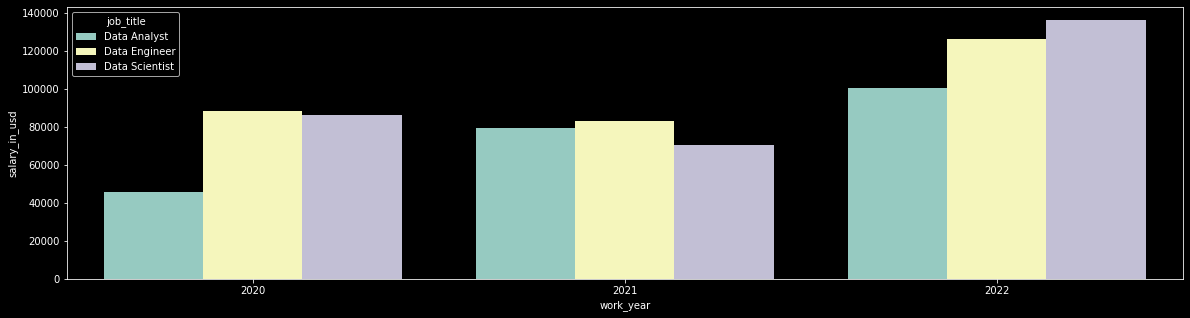

In [ ]:
# ▶ 연도 별 평균 연봉 시각화
# ▶ DS가 치고 올라왔다.
plt.figure(figsize=(20, 5))
sns.barplot(x=df_top3['work_year'].astype(str), y=df_top3['salary_in_usd'], hue='job_title', data=df_top3);

In [ ]:
# ▶ 상승률 비교
import pandas as pd
df_top3_ratio = pd.pivot_table(df_top3, index=['job_title'], columns=['work_year'], values=['salary_in_usd']).reset_index()
df_top3_ratio

job_title salary_in_usd                             
work_year                          2020          2021           2022
0            Data Analyst  45547.285714  79505.411765  100550.739726
1           Data Engineer  88162.000000  83202.531250  126375.696629
2          Data Scientist  85970.523810  70671.733333  136172.090909

In [ ]:
# ▶ multi index 해제
df_top3_ratio.columns = ['job_title', '2020_s', '2021_s', '2022_s']
df_top3_ratio

,job_title,2020_s,2021_s,2022_s
0,Data Analyst,45547.285714,79505.411765,100550.739726
1,Data Engineer,88162.000000,83202.531250,126375.696629
2,Data Scientist,85970.523810,70671.733333,136172.090909


In [ ]:
# ▶ multi index 해제
df_top3_ratio['s_i_rate_1st'] = round((df_top3_ratio['2021_s']-df_top3_ratio['2020_s']) / df_top3_ratio['2020_s']* 100,2)
df_top3_ratio['s_i_rate_2nd'] = round((df_top3_ratio['2022_s']-df_top3_ratio['2021_s']) / df_top3_ratio['2021_s']* 100,2)
df_top3_ratio['s_i_rate_total'] = round((df_top3_ratio['2022_s']-df_top3_ratio['2020_s']) / df_top3_ratio['2020_s']* 100,2)
df_top3_ratio

,job_title,2020_s,2021_s,2022_s,s_i_rate_1st,s_i_rate_2nd,s_i_rate_total
0,Data Analyst,45547.285714,79505.411765,100550.739726,74.56,26.47,120.76
1,Data Engineer,88162.000000,83202.531250,126375.696629,-5.63,51.89,43.34
2,Data Scientist,85970.523810,70671.733333,136172.090909,-17.80,92.68,58.39


### · ② 근무 지역은 연봉에 큰 영향이 없을 것이다.
---

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [ ]:
# ▶ top 10 만 출력
df['employee_residence'].value_counts().head(10)

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
Name: employee_residence, dtype: int64

In [ ]:
#  ▶ top 10 만 출력
top_10_residence = ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR', 'JP', 'PT']

df_top_10_res = pd.DataFrame(df[df['employee_residence'].isin(top_10_residence)].groupby('employee_residence')['salary_in_usd'].mean()).reset_index()
df_top_10_res

,employee_residence,salary_in_usd
0,CA,97085.310345
1,DE,85552.560000
2,ES,57593.400000
3,FR,59886.611111
4,GB,81403.159091
5,GR,56331.230769
6,IN,37322.333333
7,JP,103537.714286
8,PT,42862.500000
9,US,149194.117470


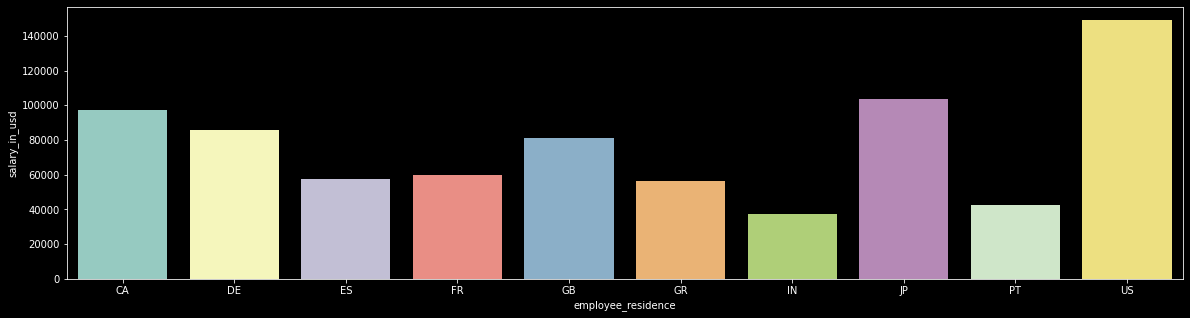

In [ ]:
# ▶ US(미국)의 평균 급여가 가장 높음
# ▶ US(미국), JP(일본), CA(캐나다), DE(독일), GB(영국), FR(프랑스), ES(스페인), GR(그리스), PT(포르투갈), IN(인도)
plt.figure(figsize=(20, 5))
sns.barplot(x=df_top_10_res['employee_residence'].astype(str), y=df_top_10_res['salary_in_usd'], data=df_top_10_res);

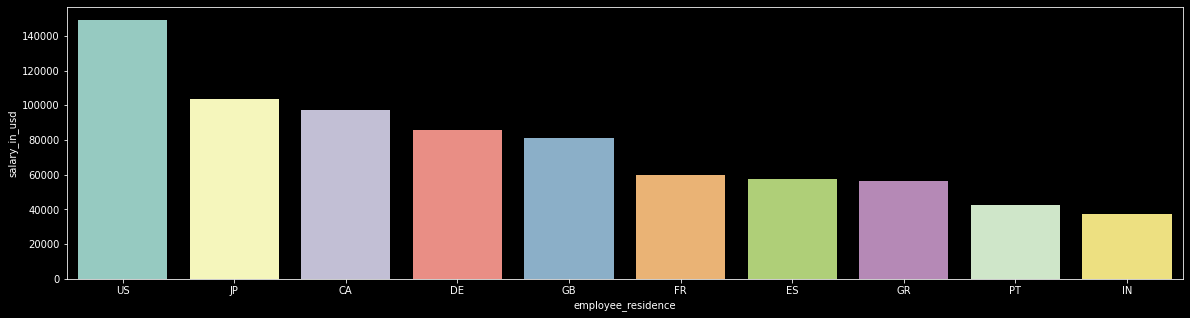

In [ ]:
# ▶ Sorting
# ▶ US(미국), JP(일본), CA(캐나다), DE(독일), GB(영국), FR(프랑스), ES(스페인), GR(그리스), PT(포르투갈), IN(인도)
df_top_10_res = df_top_10_res.sort_values(by=['salary_in_usd'], ascending = False)
plt.figure(figsize=(20, 5))
sns.barplot(x=df_top_10_res['employee_residence'].astype(str), y=df_top_10_res['salary_in_usd'], data=df_top_10_res);

### Session 3  
**┗ MLP 활용 연봉 예측**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

# 새 섹션

In [ ]:
# ▶ 범주형 변수를 모델이 이해하기 위한 숫자현 데이터로 변환(OneHotEncoder)
# ▶ 범주형 변수의 Level이 예제와 같이 많다고 하면, 다른 인코딩 방법을 고려해 볼 수 도 있음 ex) Binary encoding, Hash encoding 등
# ▶ 완벽한 정답은 없음, 모든 방법을 테스트해 보고 성능을 고려하는 것이 Best

from sklearn.preprocessing import OneHotEncoder

for col in categorical_list :
  encoder = OneHotEncoder()
  onehot = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray(), columns = encoder.get_feature_names())
  # 기존 Col은 삭제
  df = pd.concat([df,onehot], axis = 1).drop(columns = [col])

In [ ]:
df.head()

,work_year,salary_in_usd,remote_ratio,x0_EN,x0_EX,x0_MI,x0_SE,x0_CT,x0_FL,x0_FT,x0_PT,x0_3D Computer Vision Researcher,x0_AI Scientist,x0_Analytics Engineer,x0_Applied Data Scientist,x0_Applied Machine Learning Scientist,x0_BI Data Analyst,x0_Big Data Architect,x0_Big Data Engineer,x0_Business Data Analyst,x0_Cloud Data Engineer,x0_Computer Vision Engineer,x0_Computer Vision Software Engineer,x0_Data Analyst,x0_Data Analytics Engineer,x0_Data Analytics Lead,x0_Data Analytics Manager,x0_Data Architect,x0_Data Engineer,x0_Data Engineering Manager,x0_Data Science Consultant,x0_Data Science Engineer,x0_Data Science Manager,x0_Data Scientist,x0_Data Specialist,x0_Director of Data Engineering,x0_Director of Data Science,x0_ETL Developer,x0_Finance Data Analyst,x0_Financial Data Analyst,x0_Head of Data,x0_Head of Data Science,x0_Head of Machine Learning,x0_Lead Data Analyst,x0_Lead Data Engineer,x0_Lead Data Scientist,x0_Lead Machine Learning Engineer,x0_ML Engineer,x0_Machine Learning Developer,x0_Machine Learning Engineer,...,x0_AU,x0_BE,x0_BR,x0_CA,x0_CH,x0_CL,x0_CN,x0_CO,x0_CZ,x0_DE,x0_DK,x0_DZ,x0_EE,x0_ES,x0_FR,x0_GB,x0_GR,x0_HN,x0_HR,x0_HU,x0_IE,x0_IL,x0_IN,x0_IQ,x0_IR,x0_IT,x0_JP,x0_KE,x0_LU,x0_MD,x0_MT,x0_MX,x0_MY,x0_NG,x0_NL,x0_NZ,x0_PK,x0_PL,x0_PT,x0_RO,x0_RU,x0_SG,x0_SI,x0_TR,x0_UA,x0_US,x0_VN,x0_L,x0_M,x0_S
0,2020,79833,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,260000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020,109024,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,20000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2020,150000,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# ▶ Pytorch libraries import
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X=df.drop(['work_year', 'salary_in_usd'], axis=1)
Y=df['salary_in_usd']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
# ▶ 딥러닝에서 Scaling을 하는 이유
# 1) 학습 시에 미치는 중요도 일반화
# 2) Gradient descent 사용할 때 수렴 속도를 높임
# 3) 시그모이드 함수와 같은 활성 함수를 사용할 때, saturation현상(가중치 업데이트 X)이 빨리 일어나지 않도록 도와줌
# 4) Local Minimum에 빠질 위험을 감소 시킴
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train.values)
x_test =  scaler.transform(x_test.values)

In [ ]:
x_train

array([[0.5, 0. , 0. , ..., 1. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       [1. , 1. , 0. , ..., 0. , 0. , 1. ]])

### · Tensor 변환
---
* 데이터 셋을 Pytorch Tensor 데이터 셋으로 변환
* Tensor : 다차원의 배열을 통칭

In [ ]:
# ▶ torch.from_numpy 함수를 통해 데이터를 torch에서 인식할 수 있는 tesnor 형태로 변환
# ▶ ravel() : 다차원 배열을 1차원에 배열로 평탄화
x_tensor =  torch.from_numpy(x_train).float()
y_tensor =  torch.from_numpy(y_train.values.ravel()).float()
xtest_tensor =  torch.from_numpy(x_test).float()
ytest_tensor =  torch.from_numpy(y_test.values.ravel()).float()

print("[Train set Tensors] \n")
print(x_tensor)
print(y_tensor)
print("\n[Test set Tensors] \n")
print(xtest_tensor)
print(ytest_tensor)

[Train set Tensors] 

tensor([[0.5000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        ...,
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [1.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000]])
tensor([ 46759., 112900., 450000., 152000., 136600., 100000.,  90000.,   8000.,
         12901., 100000., 185100., 276000.,  18442.,  69336., 109000.,  61300.,
         50000., 120000., 110000., 168000., 175000.,  87932., 113000.,  63831.,
        180000.,  37236.,  82528., 256000., 130000., 145000.,  75000., 120000.,
        141300., 235000.,  91614., 115000., 132320.,  86703.,  45618., 130026.,
         80000.,  50000., 148261.,  72500.,  71786., 170000., 130000.,  82528.,
         77684.,  61300., 130000.,  87932.,  42000.,  20000.,  63810., 241000.,
         37300.,  90

### · Dataset 및 DataLoader 생성
---
* DL을 위한 PyTorch Dataset 및 DataLoader 생성

<img src = "https://drive.google.com/uc?id=1EryHk56mjQA6CCQdlnvXZug2OOz4rnDo" width="500" height="200">




In [ ]:
# ▶ 배치 사이즈 선정 (batch, iteration, epoch 개념 숙지)
# 1) batch : 한 번에 학습시킬 데이터의 양
# 2) epoch : 전체 학습 셋이 신경망을 통과한 횟수
# 3) iteration : 1-epoch를 마치는데 필요한 batch 개수

bs = 10
# ▶ unsqueeze(1) : 평탄화 tensor에 1차원을 추가, 차원이 없는 Tensor에 1차원이 추가됨
y_tensor = y_tensor.unsqueeze(1)
train_ds = TensorDataset(x_tensor, y_tensor)

# ▶ DataLoader : batch_size 만큼 데이터를 이동시켜주는 기능, iteration을 효율적으로 빠르게 하기 위함
train_dl = DataLoader(train_ds, batch_size=bs)

# ▶ Test set에도 동일하게 적용
ytest_tensor = ytest_tensor.unsqueeze(1)
test_ds = TensorDataset(xtest_tensor, ytest_tensor)
test_loader = DataLoader(test_ds, batch_size=bs)

In [ ]:
# ▶ 차원의 수를 맞춰주기 위해 unsqueeze(1) 사용
x_tensor.shape, y_tensor.shape

(torch.Size([485, 169]), torch.Size([485, 1]))

### · NN(Neural Network, 신경망) 설계
---
* 딥러닝 모델 학습을 위한 신경망 설계
* MLP(Multi Layer Perceptron) 구성

In [ ]:
n_input_dim = x_train.shape[1]

class Regressor(nn.Module):
    # ▶ 사용하기 위한 기본 함수들을 사전의 정의(self)
    def __init__(self):
        super(Regressor,self).__init__()
        self.fc1 = nn.Linear(n_input_dim, 300, bias=True) # 첫 번째 레이어
        self.fc2 = nn.Linear(300, 100, bias=True) # 두 번째 레이어
        self.fc3 = nn.Linear(100, 1, bias=True) # 출력 레이어
        self.relu = nn.ReLU() # 활성화 함수 ( 0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환함.)
        self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다

    # ▶ 순전파(forward network) 구성, forward process만 구성하면 backword는 자동을 구성됨(autograd, 자동미분)
    def forward(self, x):
        x = self.relu(self.fc1(x)) # 활성화 함수 적용
        x = self.dropout(self.relu(self.fc2(x))) # 은닉층에서 전달할 때, 50% 를 dropout(Connection을 무작위 drop, overfitting 방지)
        x = self.relu(self.fc3(x))
        return x

model = Regressor()
print(model)

Regressor(
  (fc1): Linear(in_features=169, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
model = Regressor()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
#weight decay : L2 정규화에서 패널티 계수를 의미함. 클수록 제약조건 강함, 람다(λ)
epochs = 100

### · 모델 학습 및 평가
---
* 딥러닝 모델 학습 및 평가

In [ ]:
model.train()
train_loss = []
# n = len(train_dl)

for epoch in range(epochs):                 # ▶100번 반복 학습
    running_loss =0.0                       # ▶ 매 에폭의 평균 loss 구하기 위해서 초기값 0으로
    for data in train_dl:                   # ▶ 각 배치를 불러온다
        inputs, values = data               # ▶ x, y data split
        optimizer.zero_grad()               # ▶ 한번에 학습이 끄탄면 gradients를 항상 0으로 만들어줘야 함
        outputs = model(inputs)             # ▶ 예측값 산출
        loss = loss_func(outputs, values)   # ▶ 손실함수 계산 및 최적화
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss/len(train_dl) # ▶ 1-epoch 내에 모든 iteration의 Loss의 평균값을 구함
    print("Loss in epoch :"+str(epoch)+" is: "+str(epoch_loss))
    train_loss.append(epoch_loss)
print('Last iteration loss value: '+ str(loss.item()))

Loss in epoch :0 is: 17648165804.408165
Loss in epoch :1 is: 17625121771.10204
Loss in epoch :2 is: 17499025240.816326
Loss in epoch :3 is: 17156588272.32653
Loss in epoch :4 is: 16494441931.755102
Loss in epoch :5 is: 15440943020.408163
Loss in epoch :6 is: 14005121452.408163
Loss in epoch :7 is: 12314462072.163265
Loss in epoch :8 is: 10402665085.387754
Loss in epoch :9 is: 8441348738.612245
Loss in epoch :10 is: 6977398407.836735
Loss in epoch :11 is: 5755315978.448979
Loss in epoch :12 is: 4833439137.959184
Loss in epoch :13 is: 4532727376.979591
Loss in epoch :14 is: 4267209067.102041
Loss in epoch :15 is: 3986214181.877551
Loss in epoch :16 is: 3845535315.591837
Loss in epoch :17 is: 3877836109.0612245
Loss in epoch :18 is: 3697066618.7755103
Loss in epoch :19 is: 3788496436.244898
Loss in epoch :20 is: 3779310061.714286
Loss in epoch :21 is: 3505383079.1836734
Loss in epoch :22 is: 3461864513.3061223
Loss in epoch :23 is: 3522472794.122449
Loss in epoch :24 is: 3361051207.836735

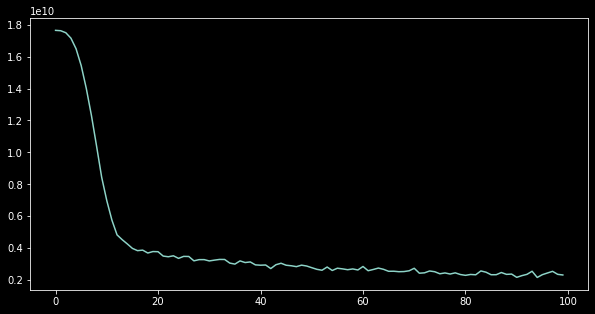

In [ ]:
# ▶ train loss 출력
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

plt.plot(train_loss)
plt.gcf().set_size_inches(10 ,5)
plt.show();

In [ ]:
predictions = torch.tensor([], dtype=torch.float) # ▶ 예측값 저장을 위한 빈 텐서
actual = torch.tensor([], dtype=torch.float) # ▶ 실제값 저장을 위한 빈 텐서


with torch.no_grad(): # ▶requires_grad 비활성화
    model.eval() # ▶ dropout과 같은 모델 학습시에만 사용하는 기법들을 비활성화

    # ▶ 배치 단위로 데이터를 예측하고 예측값과 실제값을 누적해서 저장
    for data in test_loader:
        inputs, values = data
        outputs = model(inputs)

        # ▶ torch.cat : 원하는 dimension방향으로 텐서를 나란하게 쌓아주는 기능 0(아래쪽), 1(오른쪽)
        predictions = torch.cat((predictions, outputs), 0)
        actual = torch.cat((actual, values), 0)

predictions = predictions.numpy()
actual = actual.numpy()

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(list(predictions.squeeze()), list(actual.squeeze())))

52459.387

In [ ]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

def evaluation(dataloader):

    predictions = torch.tensor([], dtype=torch.float) # ▶ 예측값 저장을 위한 빈 텐서
    actual = torch.tensor([], dtype=torch.float) # ▶ 실제값 저장을 위한 빈 텐서
    with torch.no_grad(): # ▶ requires_grad 비활성화
        model.eval() # ▶ dropout과 같은 모델 학습시에만 사용하는 기법들을 비활성화

        # ▶ 배치 단위로 데이터를 예측하고 예측값과 실제값을 누적해서 저장
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)

            # ▶ torch.cat : 원하는 dimension방향으로 텐서를 나란하게 쌓아주는 기능 0(아래쪽), 1(오른쪽)
            predictions = torch.cat((predictions, outputs), 0)
            actual = torch.cat((actual, values), 0)

    predictions = predictions.numpy()
    predictions = list(predictions.squeeze())

    actual = actual.numpy()
    actual = list(actual.squeeze())

    rmse = np.sqrt(mean_squared_error(predictions, actual))
    r2 = r2_score(actual, predictions)

    return rmse, r2


train_rmse, train_r2 = evaluation(train_dl)
test_rmse, test_r2 = evaluation(test_loader)

print('학습용 셋(rmse) :', train_rmse, '/ 학습용 셋(r2) :', train_r2)
print('테스트 셋(rmse) :', test_rmse, '/ 테스트 셋(r2) :', test_r2)

학습용 셋(rmse) : 45081.418 / 학습용 셋(r2) : 0.5869443140498025
테스트 셋(rmse) : 52459.387 / 테스트 셋(r2) : 0.4945156666126391
